0.9762676884417381


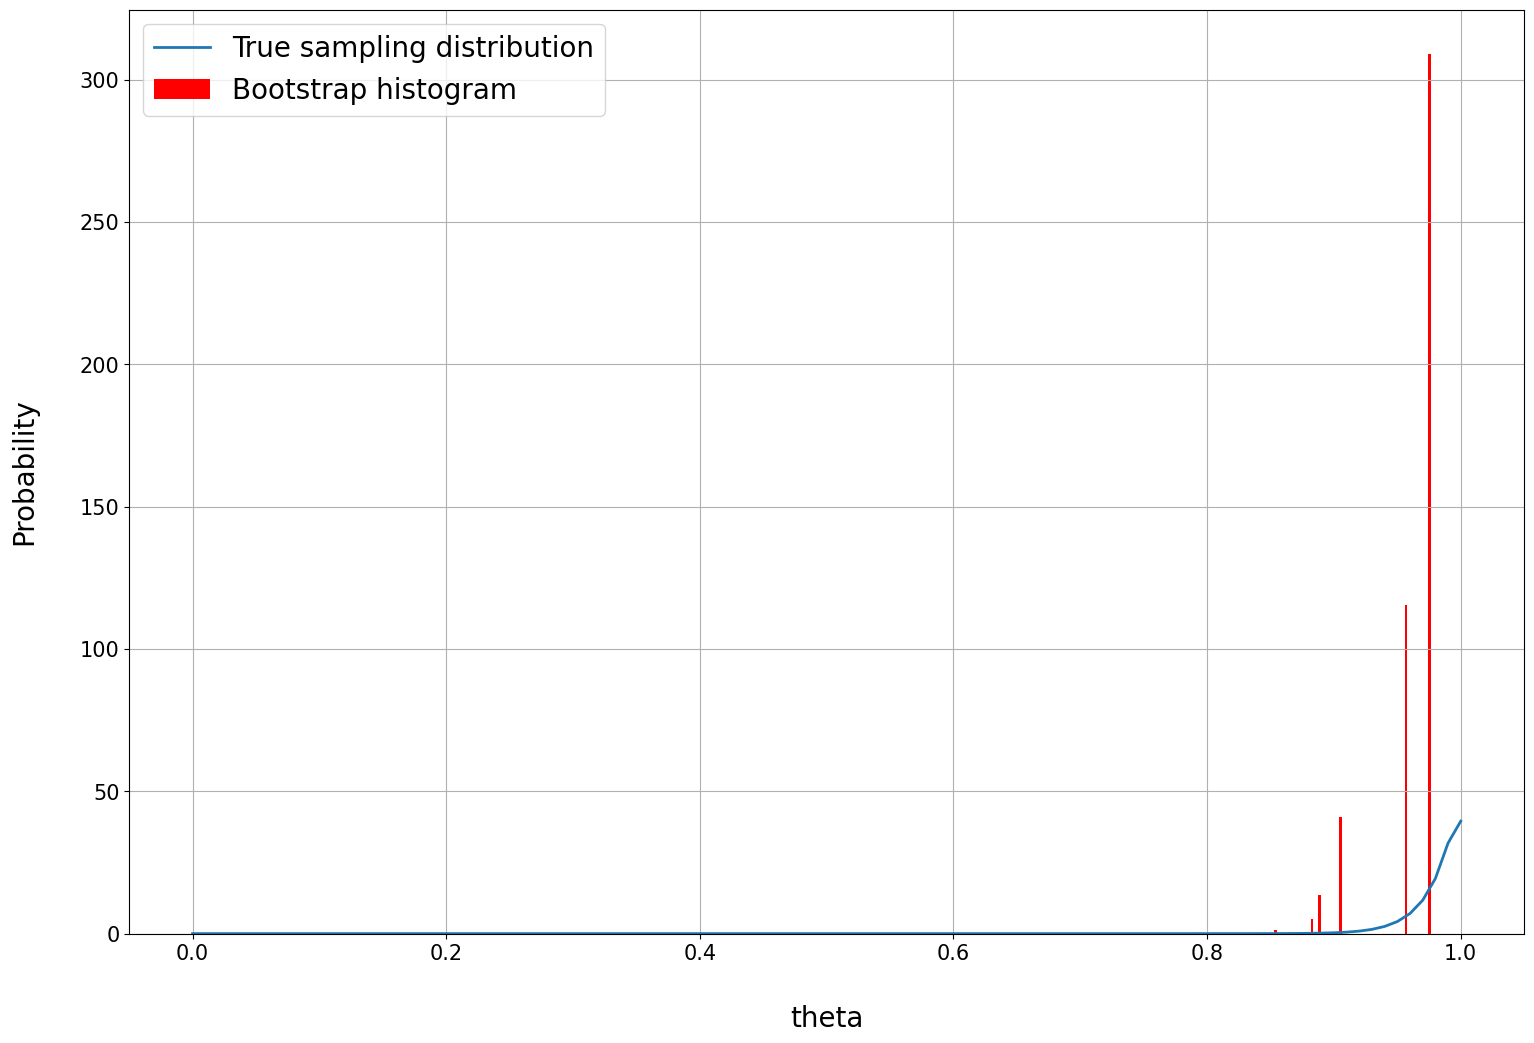

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

mu = 0
theta = 1
n = 50

X: np.ndarray = st.uniform.rvs(mu, theta, size=n)
theta_hat = X.max()
print(theta_hat)

# Bootstrap
B = 10_000
xx = np.random.choice(X, size=(B,n), replace=True)
boot: np.ndarray = xx.max(axis=1)

# Compare with true sampling
bins = 100
# tt = np.linspace(boot.min(), boot.max(), bins)
tt = np.linspace(0, 1, bins+1)

theta_cdf: np.ndarray = st.uniform.cdf(tt, loc=mu, scale=theta)**n
theta_pdf: np.ndarray = np.gradient(theta_cdf, tt)

plt.figure(figsize=(18, 12))
plt.plot(tt, theta_pdf, linewidth=2)
plt.hist(boot, bins=bins, density=True, color='r', linewidth=2)

font_size = 20
label_pad = 30

plt.legend(['True sampling distribution', 'Bootstrap histogram'], fontsize=font_size)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.xlabel('theta', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Probability', fontsize=font_size, labelpad=label_pad)

plt.grid()
plt.show()

In [24]:
%reset -f